<a href="https://colab.research.google.com/github/vigneshshiv28/DAV_60/blob/main/DAV_exp11_60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim: Explore data visualization libraries in Python and R.**

**Pyhton**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data_18 = pd.read_csv("/content/sample_data/2018.csv")
data_19 = pd.read_csv("/content/sample_data/2019.csv")
data_19.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
data_18.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [4]:
df = pd.DataFrame(data_19,columns= ["Country or region","Score"])
df.head()

,Country or region,Score
0,Finland,7.769
1,Denmark,7.600
2,Norway,7.554
3,Iceland,7.494
4,Netherlands,7.488


**Plotty**

In [5]:
import plotly.express as px
import geopandas as gpd

<ipython-input-6-ce4c87b00311>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-6-ce4c87b00311>:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


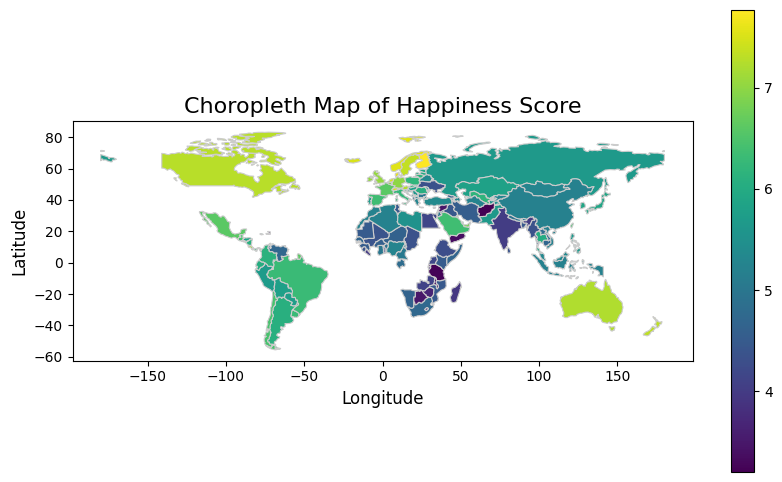

In [6]:


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_data = world.merge(df, how='left', left_on='name', right_on='Country or region')

fig, ax = plt.subplots(figsize=(10, 6))
merged_data.plot(column='Score', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8')


vmin, vmax = merged_data['Score'].min(), merged_data['Score'].max()
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

plt.title('Choropleth Map of Happiness Score', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)


plt.show()


In [7]:
df_19 = pd.DataFrame(data_19,columns= ["Country or region","Score","GDP per capita"])
df = df_19.head()

In [8]:
df_18 = pd.DataFrame(data_18,columns= ["Country or region","Score","GDP per capita"])
df_18 = df_18.head()
df_18

,Country or region,Score,GDP per capita
0,Finland,7.632,1.305
1,Norway,7.594,1.456
2,Denmark,7.555,1.351
3,Iceland,7.495,1.343
4,Switzerland,7.487,1.420


In [9]:
df = pd.merge(df_18, df_19, on='Country or region', how='outer')
df = df.head()

**Bokeh**

In [10]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

In [11]:
output_notebook()

In [12]:
p1 = figure(x_range=df['Country or region'], height=350, title="Scores Comparison (2018-2019)",
           toolbar_location=None, tools="")


p1.vbar(x=df['Country or region'], top=df['Score_x'], width=0.4, legend_label="2018",
       line_color='white', fill_color="blue", alpha=0.5)

p1.vbar(x=df['Country or region'], top=df['Score_y'], width=0.4, legend_label="2019",
       line_color='white', fill_color="orange", alpha=0.5)


p1.xaxis.major_label_orientation = "vertical"
p1.xaxis.axis_label = "Country"
p1.yaxis.axis_label = "Score"
p1.legend.location = "top_left"
p1.legend.click_policy = "hide"


show(p1)

**Implemention in R**

**RColorBrewer**

In [13]:
library(datasets)
library(RColorBrewer)


In [14]:
data(iris)

In [15]:
colors <- brewer.pal(n = 3, name = "Set1")

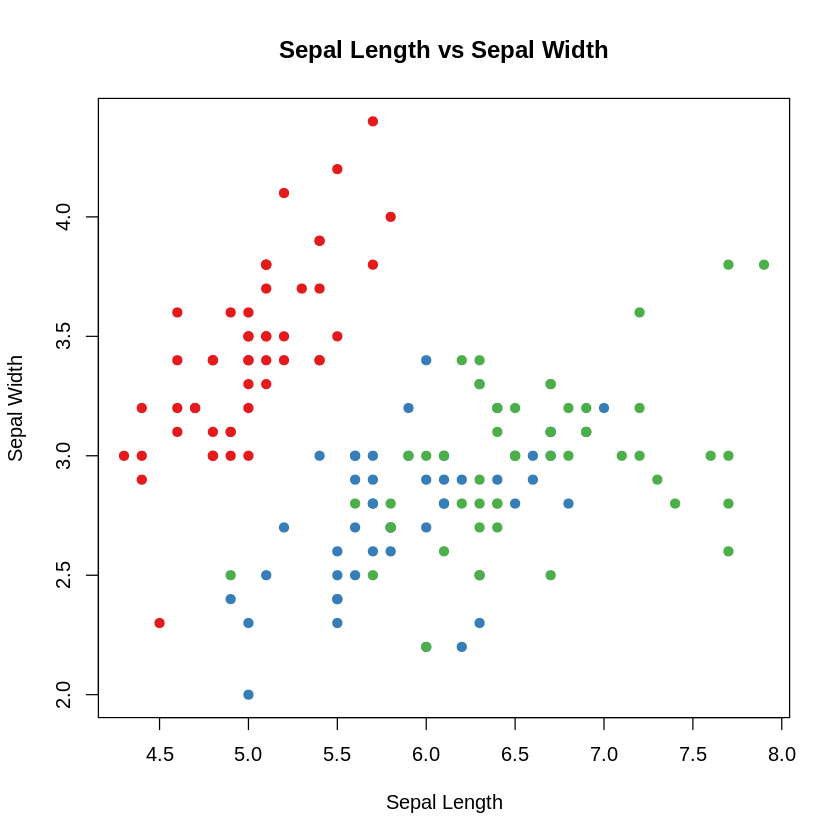

In [17]:
plot(iris$Sepal.Length, iris$Sepal.Width, col = colors[as.numeric(iris$Species)],
     pch = 19, main = "Sepal Length vs Sepal Width", xlab = "Sepal Length", ylab = "Sepal Width")


**ggplot2**

In [18]:
library(ggplot2)

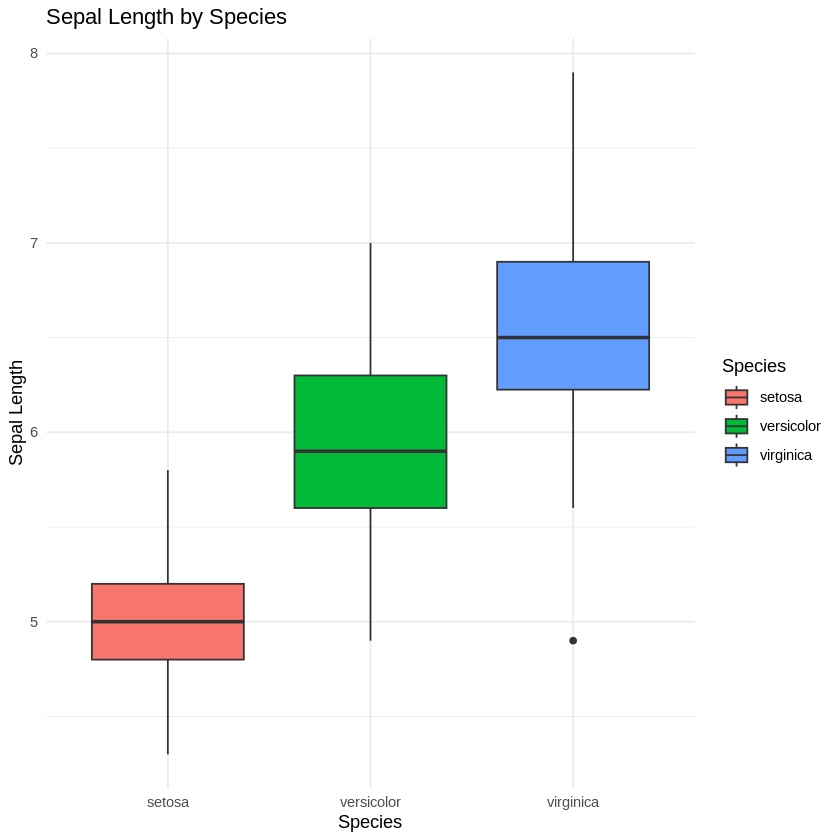

In [19]:
ggplot(iris, aes(x = Species, y = Sepal.Length, fill = Species)) +
  geom_boxplot() +
  labs(title = "Sepal Length by Species", x = "Species", y = "Sepal Length") +
  theme_minimal()